# Import and clean Data

In [2]:
import glob
import pandas as pd
%pylab inline

path =r'/Users/marinejacquemin/Downloads/Dataset+Projet+4' 
allFiles = glob.glob(path + "/*.csv")
df = pd.concat((pd.read_csv(f,error_bad_lines=False) for f in allFiles))

Populating the interactive namespace from numpy and matplotlib


/Users/marinejacquemin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys
b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'
/Users/marinejacquemin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys


In [58]:
df.shape

(5635978, 65)

### Drop useless features for further analysis

In [59]:
df1=df.drop(['QUARTER','FL_DATE','Unnamed: 64','YEAR','UNIQUE_CARRIER','ORIGIN_STATE_FIPS','TAIL_NUM','ORIGIN_CITY_MARKET_ID','DEST_STATE_FIPS','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_SEQ_ID','DEST_CITY_MARKET_ID','WHEELS_OFF','WHEELS_ON','FL_NUM','DEP_DELAY_NEW','ARR_DELAY_NEW','FLIGHTS','CRS_DEP_TIME','DEP_TIME','CRS_ARR_TIME','ARR_TIME','ORIGIN_WAC','DEST_WAC','FIRST_DEP_TIME','LONGEST_ADD_GTIME','TOTAL_ADD_GTIME','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','ARR_DEL15','DEP_DEL15','CANCELLATION_CODE','CANCELLED','DIVERTED','ARR_DELAY_GROUP','DEP_DELAY_GROUP','DISTANCE_GROUP'],1)

In [7]:
df1.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'AIRLINE_ID', 'CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR',
       'ORIGIN_STATE_NM', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_DELAY', 'DEP_TIME_BLK',
       'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'ARR_TIME_BLK', 'AIR_TIME',
       'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

Here we only have a few missing values and the dataset is big, so we just drop the rows contaning NA

In [60]:
df2 = df1.dropna(subset=['ARR_DELAY','DEP_DELAY'])
df2 = df2.drop(df2[df2.MONTH==20366].index)

In [61]:
#Get departure and arrival hours in a hh format from 0 to 24
df2.DEP_TIME_BLK = df2.DEP_TIME_BLK.str[0:2]
df2.ARR_TIME_BLK = df2.ARR_TIME_BLK.str[0:2]

In [62]:
#convert quantative variables to float
df2.TAXI_OUT = pd.to_numeric(df2.TAXI_OUT)
df2.MONTH = pd.to_numeric(df2.MONTH)
df2.DAY_OF_MONTH = pd.to_numeric(df2.DAY_OF_MONTH)
df2.DAY_OF_WEEK = pd.to_numeric(df2.DAY_OF_WEEK)
df2.DEP_TIME_BLK = pd.to_numeric(df2.DEP_TIME_BLK)
df2.ARR_TIME_BLK = pd.to_numeric(df2.ARR_TIME_BLK)

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556190 entries, 0 to 460948
Data columns (total 28 columns):
MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
AIRLINE_ID             int64
CARRIER                object
ORIGIN_AIRPORT_ID      object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
ORIGIN_STATE_NM        object
DEST_AIRPORT_ID        object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
DEST_STATE_NM          object
DEP_DELAY              float64
DEP_TIME_BLK           int64
TAXI_OUT               float64
TAXI_IN                float64
ARR_DELAY              float64
ARR_TIME_BLK           int64
AIR_TIME               float64
DISTANCE               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
dtypes: float64(11), int64(6), object(11)
m

In [19]:
list_cat_var = ['AIRLINE_ID', 'CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_NM']

# Exploratory Data Analysis

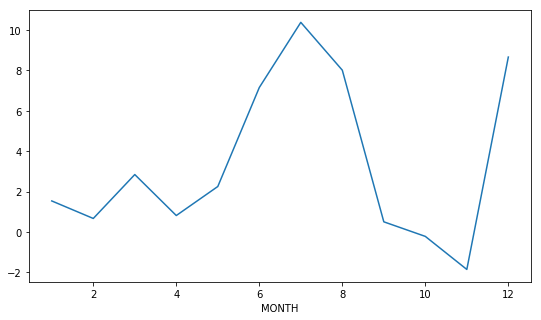

In [42]:
#Analyse bivariée
#impact du mois de départ
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,5))
month_delay_av = df2['ARR_DELAY'].groupby(df2['MONTH']).mean()
fig = month_delay_av.plot(ax=ax)
plt.ylabel=('Average ARR_DELAY')

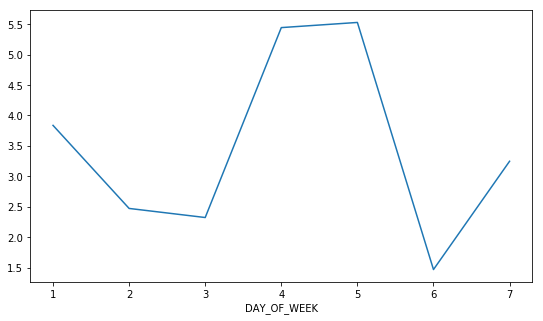

In [45]:
#impact du jour de la semaine
fig, ax = plt.subplots(figsize=(9,5))
month_delay_av = df2['ARR_DELAY'].groupby(df2['DAY_OF_WEEK']).mean()
fig = month_delay_av.plot(ax=ax)
plt.ylabel=('Average ARR_DELAY')

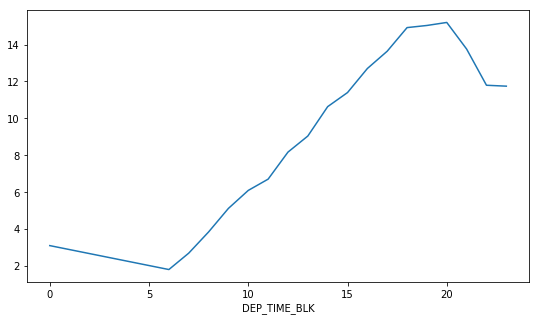

In [46]:
#impact de l'heure de départ

fig, ax = plt.subplots(figsize=(9,5))
month_delay_av = df2['DEP_DELAY'].groupby(df2['DEP_TIME_BLK']).mean()
fig = month_delay_av.plot(ax=ax)
plt.ylabel=('Average DEP_DELAY')

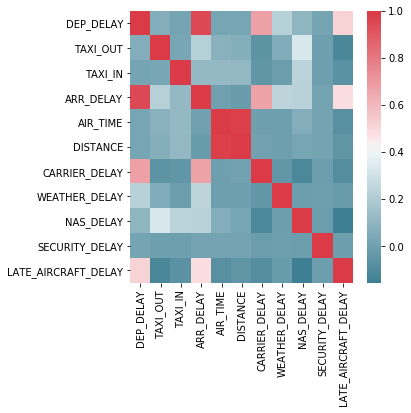

In [37]:
import seaborn as sns
corr = df2.drop([x for x in list_cat_var],1).loc[:,df2.dtypes == 'float64'].corr()
fig = plt.figure(1, figsize=(5,5))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [16]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df2['ARR_DELAY'].groupby(df2['CARRIER']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,count,max,mean,min
CARRIER,,,,
VX,66500.0,463.0,7.428977,-83.0
HA,76334.0,1461.0,-0.057838,-74.0
F9,94505.0,920.0,7.934480,-70.0
NK,135371.0,1637.0,9.328209,-99.0
AS,165641.0,993.0,-2.085444,-87.0
B6,280248.0,798.0,8.188504,-97.0
EV,489511.0,1439.0,5.552880,-91.0
UA,538188.0,1213.0,1.755565,-92.0
OO,593938.0,1395.0,4.275281,-152.0


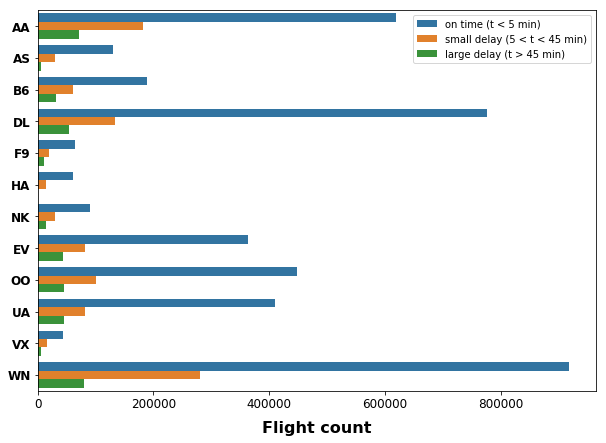

In [26]:
# Function that define how delays are grouped
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df2['DELAY_LEVEL'] = df2['ARR_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="CARRIER", hue='DELAY_LEVEL', data=df2)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [31]:
print("Nb of airports: {}".format(len(df2['ORIGIN_AIRPORT_ID'].unique())))

Nb of airports: 475


In [30]:
# Creation of a dataframe with statitical infos on each aiport:
global_stats = df2['ARR_DELAY'].groupby(df2['ORIGIN']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

#conclusion : high variability of delays between airports and airlines

,count,max,mean,min
ORIGIN,,,,
MHK,1.0,-1.0,-1.000000,-1.0
EFD,1.0,56.0,56.000000,56.0
SPN,1.0,15.0,15.000000,15.0
AKN,63.0,91.0,-1.444444,-26.0
PGD,78.0,170.0,0.884615,-42.0
DLG,83.0,99.0,-1.457831,-33.0
GST,83.0,92.0,-0.542169,-34.0
MMH,91.0,973.0,20.307692,-23.0
ADK,95.0,86.0,-1.336842,-48.0


# Multivariate Analysis  : ACP

In [52]:
X = df2.select_dtypes(include=['float'])
X = X.fillna(0)

In [56]:
#on standardise les variables
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled.shape

(5556190, 11)

In [ ]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final,y_final,test_size = 0.2,random_state = 0) # Do 80/20 split

In [63]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=3)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [64]:
print (pca.explained_variance_ratio_) #la premiere composante explique 28% de la variance et la deuxième 18%
print (pca.explained_variance_ratio_.sum())

[0.27847902 0.18428648 0.11710457]
0.5798700643504886


TypeError: 'str' object is not callable

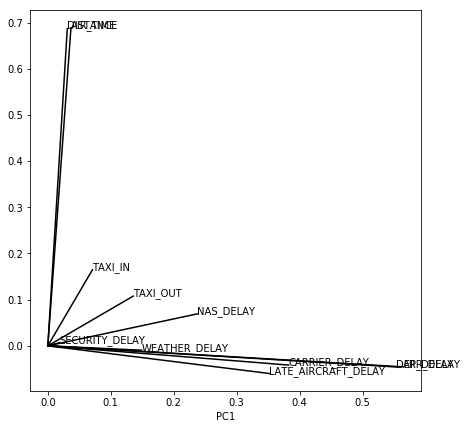

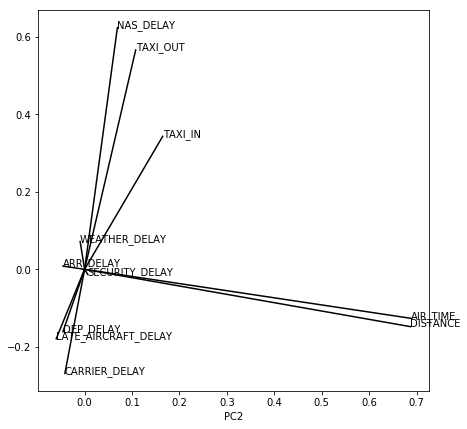

In [80]:
pcs = pca.components_
fig = plt.figure(figsize=(7,7)) 
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
     plt.plot([0, x], [0, y], color='k')
     plt.text(x,y,X.columns[i])
    
   
plt.xlabel('PC1')
plt.ylabel('PC2')

pcs = pca.components_
fig = plt.figure(figsize=(7,7)) 
for i, (x, y) in enumerate(zip(pcs[1, :], pcs[2, :])):
     plt.plot([0, x], [0, y], color='k')
     plt.text(x,y,X.columns[i])
    
   
plt.xlabel('PC2')
plt.ylabel('PC3')

In [75]:
#Distance and Air Time are highly correlated
#Arr and Dep delay are highly correlated
#No correlation between distance and Delays (var independant)

In [47]:
missing_df = df2.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df2.shape[0]-missing_df['missing values'])/df2.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,SECURITY_DELAY,4587753,17.429876
1,NAS_DELAY,4587753,17.429876
2,WEATHER_DELAY,4587753,17.429876
3,CARRIER_DELAY,4587753,17.429876
4,LATE_AIRCRAFT_DELAY,4587753,17.429876
5,DISTANCE,1,99.999982
6,AIR_TIME,1,99.999982
7,MONTH,0,100.000000
8,ARR_TIME_BLK,0,100.000000
9,ARR_DELAY,0,100.000000


In [64]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN',
                       'SECURITY_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY','NAS_DELAY']
df2 = df2.drop(variables_to_remove, axis = 1, inplace = True)

In [69]:
df2.dropna()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,...,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_DELAY,DEP_TIME_BLK,ARR_DELAY,ARR_TIME_BLK,AIR_TIME,DISTANCE
0,1,6,3,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-3.0,11,-6.0,14,132.0,986.0
1,1,7,4,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-4.0,11,-12.0,14,126.0,986.0
2,1,8,5,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-5.0,11,7.0,14,135.0,986.0
3,1,9,6,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,2.0,11,-5.0,14,129.0,986.0
4,1,10,7,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,100.0,11,113.0,14,137.0,986.0
5,1,11,1,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,7.0,11,-3.0,14,128.0,986.0
6,1,12,2,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-1.0,11,0.0,14,136.0,986.0
7,1,13,3,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-5.0,11,-7.0,14,132.0,986.0
8,1,14,4,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-2.0,11,-10.0,14,130.0,986.0
9,1,15,5,19805,AA,11298,DFW,"Dallas/Fort Worth, TX",TX,Texas,...,DTW,"Detroit, MI",MI,Michigan,-4.0,11,-4.0,14,133.0,986.0


In [ ]:
#on enregistre le fichier nettoyé avant de passer à l'analyse multivariée (RLM, Ridge, Lasso, Elastic)
df2.to_csv("/Users/marinejacquemin/Desktop/airline.csv")

In [71]:
df2.shape

(5556190, 21)